## 1.MNIST 분류

### 1-1. 환경 구성: import


In [ ]:
import tensorflow as tf    # tensorflow의 별명은 tf로 한다
from tensorflow import keras

print(tf.__version__)      # version 앞뒤로 두 개의 밑줄

2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1-2. MNIST 데이터 가져오기



In [ ]:
# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 1-3. 데이터 살펴보기

In [ ]:
print('X_train.shape =', X_train.shape, 'y_train.shape =', y_train.shape)
print('X_test.shape  =', X_test.shape, 'y_test.shape  =', y_test.shape)

X_train.shape = (60000, 28, 28) y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28) y_test.shape  = (10000,)


In [ ]:
num = X_train[0]
for i in range(28):
  for j in range(28):
    print(f"{num[i][j] : 4d}", end='')
  print()

print()
y_train[0]

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

5

 MNIST 데이터를 이미지로 살펴보기

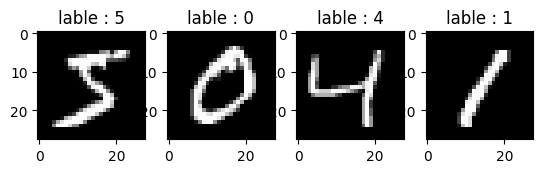

In [ ]:
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.title(f"lable : {y_train[i]}")
  plt.imshow(X_train[i], cmap="gray")

### 1-4. 데이터 전처리

In [ ]:
#입력값 전처리 : 0에서 1사이의 값으로 입력 데이터를 가공함-정규화

X_train, X_test = X_train / 255, X_test / 255

### 1-5. 심층 신경망 모델 만들기

#### (1) 모델 구성: Sequential(), Flatten(), Dense() ...

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # i 행렬 일렬로 줄 세우기
    keras.layers.Dense(256, activation="relu"), # 층 쌓기
    keras.layers.Dense(10, activation="softmax") # 최종 아웃풋 - 0~9 중 하나
])

#### (2) 모델 요약 보기: summary()

> - 입력층 노드: 28*28 = 784
> - 입력층-은닉층 연결: 784*256+256(편향)) = 200,960
> - 은닉층-출력층 연결: (256+1) * 10 = 2,570
> - 전체 파라미터 개수: 200,960 + 2,570 = 203,530

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### (3) 학습 과정 설정: compile()


In [ ]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['acc'])

#### (4) 모델 학습: fit()

In [ ]:
# https://keras.io/api/models/model_training_apis/
# batch_size를 입력하지 않으면 기본값은 32이다. 60000/32=1875

history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2237 - acc: 0.9359
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0905 - acc: 0.9720
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - acc: 0.9812
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0439 - acc: 0.9863
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0332 - acc: 0.9895


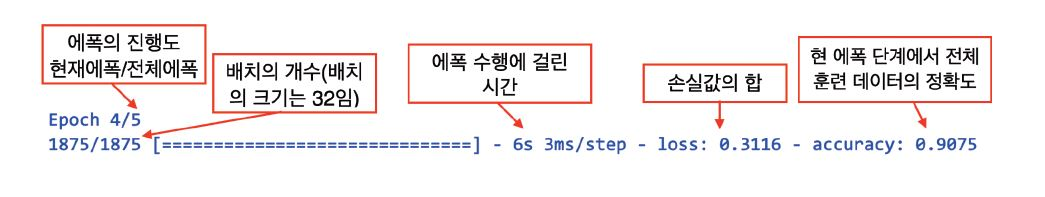

#### (5) 모델 평가: evaluate()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.0785 - acc: 0.9761 - 692ms/epoch - 2ms/step

테스트 정확도: 0.9761000275611877


신경망의 학습 데이터는 동일하지만 학습 때 사용되는 모델의 초기 가중치는 매번 랜덤하게 결정되므로 동일한 모델을 만들더라도 매번 정확도 값이 다르게 나타날 수 있음.

#### (6) 학습과정 살펴보기: 시각화

In [ ]:
history.history.keys()
history.history.values()
history.history.items()

dict_items([('loss', [0.22365280985832214, 0.09052925556898117, 0.06184134632349014, 0.0438576340675354, 0.033178623765707016]), ('acc', [0.935949981212616, 0.9719833135604858, 0.981249988079071, 0.9862833619117737, 0.9894999861717224])])

#### * 결과 시각화 함수:draw_acc_loss()

In [ ]:
import matplotlib.pyplot as plt

def draw_acc_loss(his_dict):
  loss = his_dict['loss']
  epochs = range(1, len(loss)+1)

  plt.title('loss/accuracy')
  plt.xlabel('epochs')
  plt.ylabel('loss/accuracy')

  plt.plot(epochs, his_dict['acc'], color='red', label='train_acc')
  plt.plot(epochs, his_dict['loss'], color='blue', label='train_loss')
  plt.ylim(0, 1)

  plt.legend()
  plt.show()

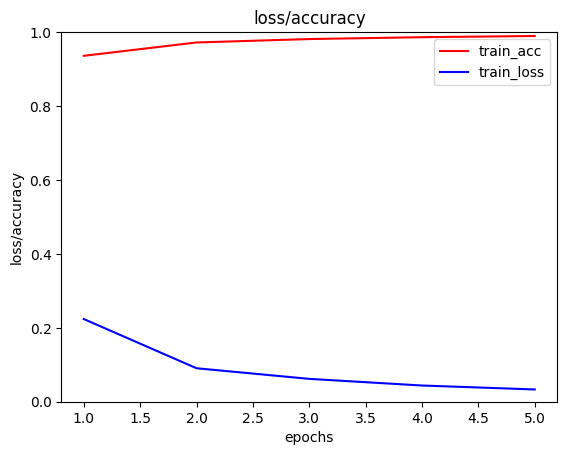

In [ ]:
draw_acc_loss(history.history)

### 1-6. 인공 신경망의 성능 개선

인공 신경망의 성능을 조금 더 개선하는 방법

1. 데이터를 더 많이 사용하기
2. 모델을 바꾸기 (학습을 위한 은닉층을 더 깊게 만들기, 노드의 개수 늘리기)
3. 하이퍼파라미터(epoch, batch_size 등) 튜닝하기 등의 방법이 있을 수 있다.

#### (1) 은닉층 추가 I

In [ ]:
# 은닉층 추가
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dense(64, activation='relu'),
#    2의 배수

model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# 모델 요약하기
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#모델 설정
model_3.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['acc'])

#모델 학습
history_3 = model_3.fit(X_train, y_train, epochs=5)

#모델 평가
test_loss_3, test_acc_3 = model_3.evaluate(X_test, y_test, verbose=2)
print('\n테스트 정확도:', test_acc_3)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3026 - acc: 0.0987
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - acc: 0.0987
313/313 - 1s - loss: 2.3026 - acc: 0.0980 - 962ms/epoch - 3ms/step

테스트 정확도: 0.09799999743700027


#### (2) 은닉층 추가 II

In [ ]:
# 은닉층 추가
#    keras.layers.Dense(1256, activation='relu'),
#    keras.layers.Dense(512, activation='relu'),

model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)               

In [ ]:
#모델 설정
model_5.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['acc'])

#모델 학습
history_5 = model_5.fit(X_train, y_train, epochs=5)

#모델 평가
test_loss_5, test_acc_5 = model_5.evaluate(X_test, y_test, verbose=2)
print('\n테스트 정확도:', test_acc_5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2308 - acc: 0.9317
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0999 - acc: 0.9709
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0718 - acc: 0.9791
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - acc: 0.9831
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - acc: 0.9863
313/313 - 1s - loss: 0.1022 - acc: 0.9760 - 677ms/epoch - 2ms/step

테스트 정확도: 0.9760000109672546


#### (3) 각 layer의 노드의 수 조절

In [ ]:
# 각자 해보기

#### (4) 하이퍼파라미터 조절

epochs, batch_size, optimizer 등을 조정하며 테스트 해볼 수 있다

In [ ]:
# 각자 해보기

# 하지만 이 데이터의 경우 원래의 정확도가 높아서 더 높이려고 애쓸 필요가 없다..................

#### (5) 검증 데이터셋으로 검증하기

만일 원래의 train set을 train set과 validation set으로 나누어 검증하며 학습하면 성능이 더 좋아질까?

새로운 데이터 구성
- X_train (60,000개, train 데이터) = XX_train(48,000개, train 데이터) + XX_test(12,000개, validation 데이터)
- X_test (10,000개, test 데이터)

- y_train (60,000개, train 데이터) = yy_train(48,000개, train 데이터) + yy_test(12,000개, validation 데이터)
- y_test (10,000개, test 데이터)

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 데이터를 7:3의 비율로 분리해서 훈련데이터와 검증데이터를 만든다
XX_train, XX_val, yy_train, yy_val = train_test_split(X_train, y_train, test_size=0.3, random_state=777)
# random_state = 777 seed같은 역할 숫자는 아무거나 괜찮음
print(f'훈련 데이터:{XX_train.shape}, 레이블:{yy_train.shape}')
print(f'검증 데이터:{XX_val.shape}, 레이블:{yy_val.shape}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


가장 초기에 구성한 모델을 그대로 사용해서 학습을 시킨다

In [ ]:
history = model.fit(XX_train, yy_train, epochs=5, validation_data=(XX_val, yy_val))

Epoch 1/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0313 - val_acc: 0.9896
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0158 - acc: 0.9955 - val_loss: 0.0278 - val_acc: 0.9908
Epoch 3/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0130 - acc: 0.9960 - val_loss: 0.0408 - val_acc: 0.9866
Epoch 4/5
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0108 - acc: 0.9967 - val_loss: 0.0444 - val_acc: 0.9855
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0102 - acc: 0.9970 - val_loss: 0.0306 - val_acc: 0.9913


학습 결과를 그려보자

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### * 결과 시각화 함수:draw_acc_loss_val()

In [ ]:
import matplotlib.pyplot as plt

def draw_acc_loss_val(his_dict):
    loss = his_dict['loss']
    val_loss = his_dict['val_loss'] # 검증 데이터

    epochs = range(1, len(loss) + 1)
    plt.figure(figsize = (10, 5))

    # 훈련 및 검증 손실 그리기
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, color = 'blue', label = 'train_loss')
    plt.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
    plt.title('train and val loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

    acc = his_dict['acc']
    val_acc = his_dict['val_acc']

    # 훈련 및 검증 정확도 그리기
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, color = 'red', label = 'train_acc')
    plt.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
    plt.title('train and val accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()



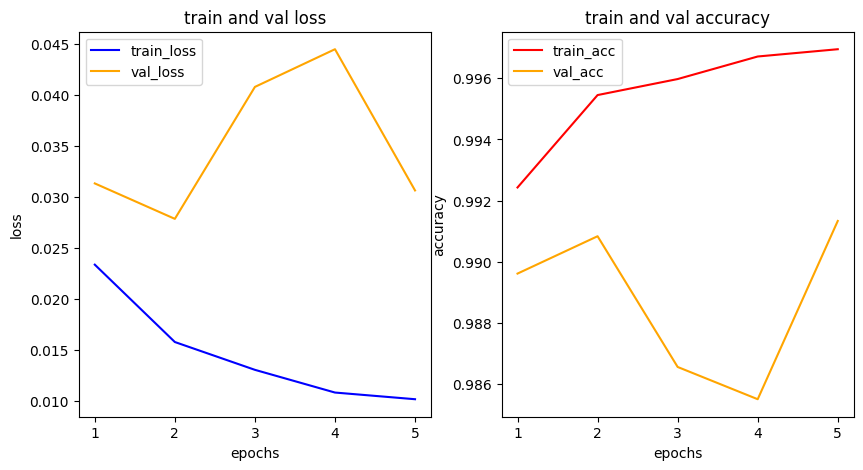

In [ ]:
draw_acc_loss_val(history.history)

초기의 모델에서 epochs 수만 늘려서 학습시켜 보자: fit()

In [ ]:
history = model.fit(XX_train, yy_train, epochs=50, validation_data=(XX_val, yy_val))

Epoch 1/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0065 - acc: 0.9979 - val_loss: 0.0398 - val_acc: 0.9881
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0089 - acc: 0.9973 - val_loss: 0.0452 - val_acc: 0.9875
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0530 - val_acc: 0.9857
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0086 - acc: 0.9974 - val_loss: 0.0488 - val_acc: 0.9863
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0400 - val_acc: 0.9889
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0049 - acc: 0.9985 - val_loss: 0.0567 - val_acc: 0.9860
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.0495 - val_acc: 0.9865
Epoch 8/50
1313/1313 [==============================] - 5s 4ms

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.1975 - acc: 0.9778 - 550ms/epoch - 2ms/step

테스트 정확도: 0.9778000116348267


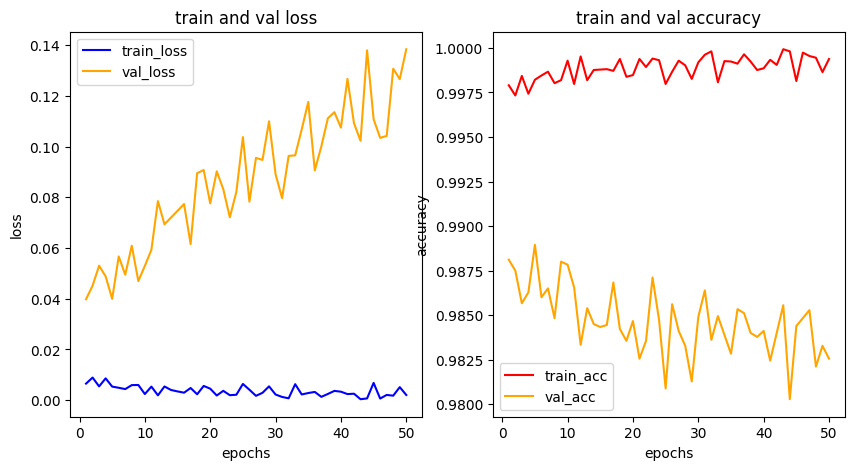

In [ ]:
draw_acc_loss_val(history.history)

### 1-7. 새로운 이미지로 테스트

In [ ]:
X_test.shape

(10000, 28, 28)

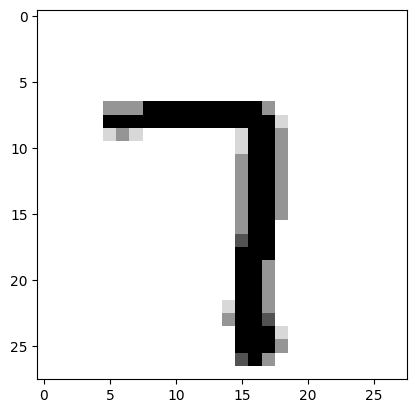

In [ ]:
randIdx = np.random.randint(0,9999)   # 10,000개의 테스트 이미지 중 하나를 선택
plt.imshow(X_test[randIdx], cmap="Greys")

In [ ]:
# 2차원 데이터를 3차원으로 수정 필요 error 발생
y_hat = model.predict(X_test[randIdx])

InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-54-fa85ea6ff874>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 241, in call

Matrix size-incompatible: In[0]: [28,28], In[1]: [784,256]
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_predict_function_659363]

In [ ]:
# 각각의 레이블과 일치하는 정도를 0에서 1 사이의 확률값으로 출력
# 2차원 데이터를 3차원으로 수정 필요
y_hat = model.predict(X_test[randIdx][np.newaxis, :,:])
print(y_hat)
print("손글씨 판정: ", y_hat.argmax())

1/1 [==============================] - 0s 19ms/step
[[8.0342898e-35 6.0532472e-29 1.8870628e-22 4.1847231e-26 0.0000000e+00
  1.2555875e-38 0.0000000e+00 1.0000000e+00 2.2263465e-37 4.4462741e-28]]
손글씨 판정:  7


### 1-8. 본인의 손글씨로 테스트 하기

#### (1) 손글씨파일 업로드

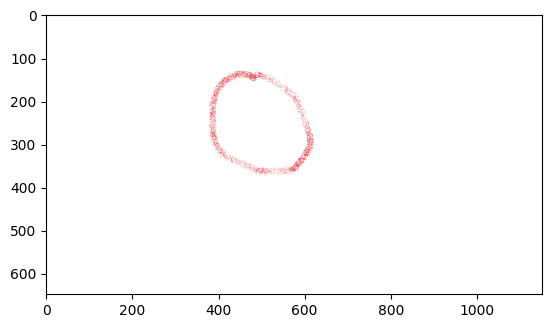

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread("/content/zero.png")
plt.imshow(img, cmap='Greys')

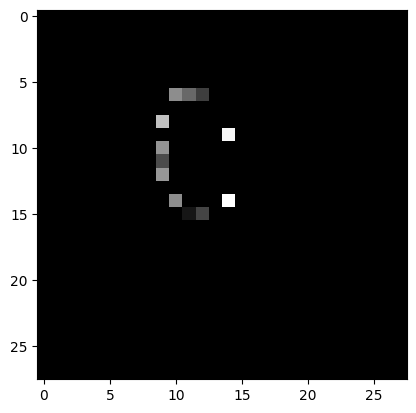

In [ ]:
# 이미지의 사이즈를 28X28로 맞춰주기 위해서 사용함
import cv2
img = cv2.imread("/content/zero.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
plt.imshow(img, cmap="Greys")

#### (2) 분류예측 실행

In [ ]:
num = img
for i in range(28):
  for j in range(28):
    print(f"{num[i][j] : 4f}", end='')
  print()

print()
y_train[0]

 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094
 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094
 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094
 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.996094 0.9960

5

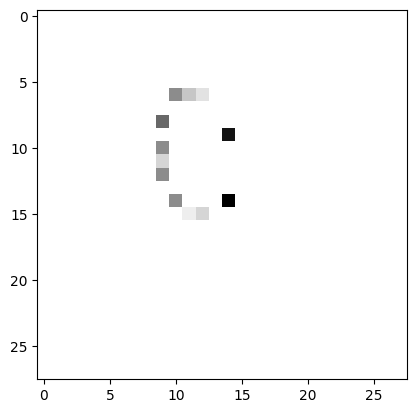

In [ ]:
img = (255-img) / 255
plt.imshow(img, cmap="Greys")

In [ ]:
y_hat = model.predict(img[np.newaxis, :,:])
print(y_hat)
print("손글씨 판정: ", y_hat.argmax())

1/1 [==============================] - 0s 20ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3254783e-36 0.0000000e+00
  1.0000000e+00 0.0000000e+00 2.6980788e-27 0.0000000e+00 0.0000000e+00]]
손글씨 판정:  5


#### !! 데이터의 전처리는 매우 중요하다

In [ ]:
for i in range(28):
    for j in range(28):

    print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 208 131 131 131 131 131 131 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 131 131 131 131 131 131 131 131 131 131 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 131 131 131 131 131 186 255 255 255 131 131 131 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 131 131 255 255 255 255 255 255 255 255 131 132 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 225 131 131 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 131 131 131 131 255 255 255 255 255 255 255

In [ ]:
# 이미지의 색상을 반전시키고 0에서 1사이의 실수로 만들자
img =

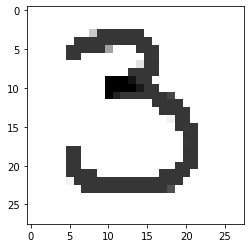

In [ ]:
plt.imshow(img, cmap='Greys')

#### (3) 전처리 후 분류예측 실행

In [ ]:
y_hat =
print(y_hat)
print("손글씨 판정: ",)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
손글씨 판정:  3
